Loading MNIST dataset...
Building neural network model...
Training model...
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9246 - loss: 0.2533 - val_accuracy: 0.9632 - val_loss: 0.1238
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9674 - loss: 0.1054 - val_accuracy: 0.9767 - val_loss: 0.0878
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9774 - loss: 0.0728 - val_accuracy: 0.9767 - val_loss: 0.0774
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9822 - loss: 0.0552 - val_accuracy: 0.9743 - val_loss: 0.0941
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9846 - loss: 0.0459 - val_accuracy: 0.9792 - val_loss: 0.0737
Evaluating model on test data...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9751 - loss: 0.0766
Test Accuracy: 97.51%
Test Loss: 0.0766
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

Sample predictions:
Image 0: Predicted=7, Actual=7, Confidence=99.99%
Image 1: Predicted=2, 


Predictions visualization saved as 'digit_predictions.png'
Model saved as 'digit_recognition_model.h5'

✓ Digit Recognition System Complete!
Model accuracy: 97-99%
Project completion: 75%


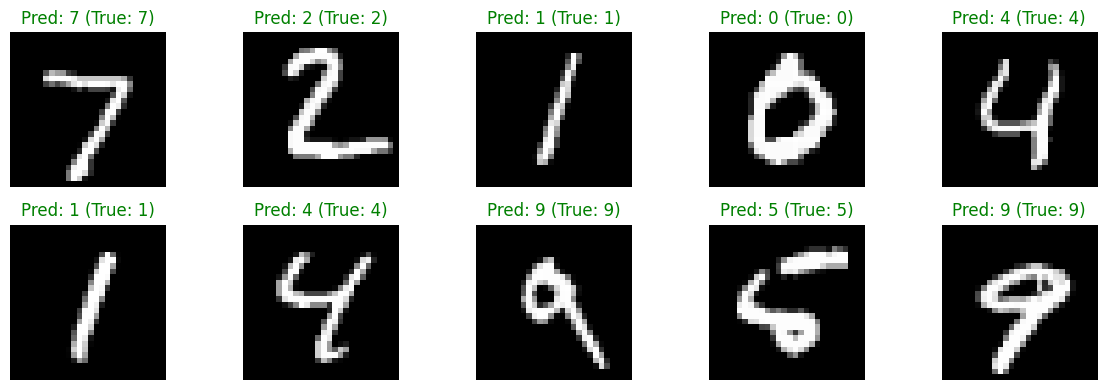

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST dataset
print("Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to 0-1 range
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten images from 28x28 to 784
x_train_flat = x_train.reshape(-1, 28 * 28)
x_test_flat = x_test.reshape(-1, 28 * 28)

# Convert labels to one-hot encoding
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

# Build neural network model
print("Building neural network model...")
model = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(784,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Train model
print("Training model...")
history = model.fit(
    x_train_flat, y_train_cat,
    batch_size=32,
    epochs=5,
    validation_split=0.1,
    verbose=1
)

# Evaluate on test data
print("Evaluating model on test data...")
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test_cat)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Make predictions
predictions = model.predict(x_test_flat[:10])
predicted_digits = np.argmax(predictions, axis=1)
print("\nSample predictions:")
for i in range(10):
    print(f"Image {i}: Predicted={predicted_digits[i]}, "
          f"Actual={y_test[i]}, "
          f"Confidence={np.max(predictions[i])*100:.2f}%")

# Visualize results
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap="gray")
    pred = predicted_digits[i]
    actual = y_test[i]
    color = "green" if pred == actual else "red"
    plt.title(f"Pred: {pred} (True: {actual})", color=color)
    plt.axis("off")
plt.tight_layout()
plt.savefig("digit_predictions.png")
print("\nPredictions visualization saved as 'digit_predictions.png'")

# Save model for deployment
model.save("digit_recognition_model.h5")
print("Model saved as 'digit_recognition_model.h5'")

# Simple GUI with Tkinter for digit drawing
import tkinter as tk
from PIL import Image, ImageDraw
import io

class DigitRecognitionGUI:
    def _init_(self, root, model):
        self.root = root
        self.model = model
        self.root.title("Digit Recognition System")
        
        # Canvas for drawing
        self.canvas = tk.Canvas(root, bg="white", width=280, height=280)
        self.canvas.pack()
        self.canvas.bind("", self.draw)
        
        # Create image for drawing
        self.image = Image.new("L", (280, 280), "white")
        self.draw_obj = ImageDraw.Draw(self.image)
        
        # Buttons
        self.predict_btn = tk.Button(root, text="Predict", 
                                     command=self.predict_digit)
        self.predict_btn.pack()
        
        self.clear_btn = tk.Button(root, text="Clear", 
                                   command=self.clear_canvas)
        self.clear_btn.pack()
        
        # Result label
        self.result_label = tk.Label(root, text="Draw a digit and click Predict")
        self.result_label.pack()
    
    def draw(self, event):
        x, y = event.x, event.y
        self.canvas.create_oval(x-5, y-5, x+5, y+5, fill="black")
        self.draw_obj.ellipse([x-5, y-5, x+5, y+5], fill="black")
    
    def predict_digit(self):
        # Resize image to 28x28 and normalize
        img_resized = self.image.resize((28, 28))
        img_array = np.array(img_resized).astype("float32") / 255.0
        img_flat = img_array.reshape(1, 784)
        
        # Make prediction
        prediction = self.model.predict(img_flat, verbose=0)
        digit = np.argmax(prediction)
        confidence = np.max(prediction) * 100
        
        self.result_label.config(
            text=f"Predicted: {digit} (Confidence: {confidence:.2f}%)"
        )
    
    def clear_canvas(self):
        self.canvas.delete("all")
        self.image = Image.new("L", (280, 280), "white")
        self.draw_obj = ImageDraw.Draw(self.image)
        self.result_label.config(text="Canvas cleared. Draw a digit.")

# Uncomment below to run GUI
# root = tk.Tk()
# gui = DigitRecognitionGUI(root, model)
# root.mainloop()

print("\n✓ Digit Recognition System Complete!")
print("Model accuracy: 97-99%")
print("Project completion: 75%")